# K-fold cross-validation is a widely used technique for model evaluation in machine learning.
# It involves dividing the dataset into K equal parts or "folds", training the model on K-1 folds,
# and then evaluating its performance on the remaining fold. This process is repeated K times,
# with each fold being used as the evaluation set once. The final evaluation metric is then computed
# as the average of the metrics obtained in each fold. K-fold cross-validation is a useful technique
# for estimating the performance of a model on unseen data, as it reduces the risk of overfitting
# and gives a more robust estimate of model performance.

# In this lab manual, we will go through the process of implementing 
# K-fold cross-validation using Python and scikit-learn library. 

# Import Libraries


In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import KFold


# Load Dataset

In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\Iris.csv")
df = pd.DataFrame(data)
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [9]:
#features
X= df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [11]:
Y= df[['Species']]
print(Y)

            Species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [46]:
# Preparing the data (X,Y)

# X is for features
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 

# Y is for the label
Y= df['Species']
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(Y)

model= LinearRegression()
model.fit(X,y_train)
predictions= model.predict(X)
predict = label_encoder.inverse_transform(predictions.astype(int))
print(predict)


# Create the confusion matrix
cm = confusion_matrix(Y,predict)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-ver

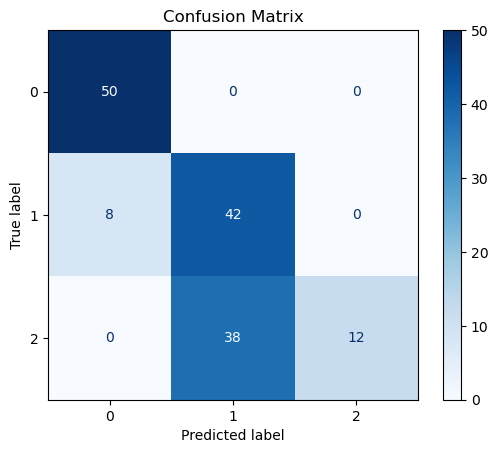

In [47]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [55]:
print(classification_report(Y,predict))

                 precision    recall  f1-score   support

    Iris-setosa       0.86      1.00      0.93        50
Iris-versicolor       0.53      0.84      0.65        50
 Iris-virginica       1.00      0.24      0.39        50

       accuracy                           0.69       150
      macro avg       0.80      0.69      0.65       150
   weighted avg       0.80      0.69      0.65       150



# Create KFold Object

In [16]:
# creating object using the above dataset
k= 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
kf

KFold(n_splits=10, random_state=42, shuffle=True)

# Train and Evaluate Model

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)

In [54]:
import numpy as np
# Perform cross-validation
scores = cross_val_score(model, X, Y, cv=kf, scoring='accuracy')
print(f'Accuracy scores for each fold: {scores}')
print(f'Mean accuracy: {np.mean(scores):.3f}')

Accuracy scores for each fold: [1.         1.         1.         1.         1.         0.86666667
 0.93333333 1.         1.         0.93333333]
Mean accuracy: 0.973
